___
# Ciência dos Dados - PROJETO 2

___
## Luciana Cocito Alves de Freitas

## Rodrigo Gatti Coutinho

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lucia\OneDrive\Documentos\GitHub\CD DP\P2\Projeto2CDDP\Projeto2CDDP-master


In [3]:
base_dados = pd.read_excel('spamhamV2.xlsx')

Tirando todos os tipos de caracteres que podem interferir.

In [4]:
n = base_dados.Email.count()

troca = ['÷','  ','‰','!','@','#','$','%','¨','&','*','(',')','-','_','+','=','§','{','}','[',']','ª','º','?','/','°','\n','|',',','.',';',':','å','£']

for e in range(n):
    base_dados.Email[e:e+1] = base_dados.Email[e:e+1].str.replace('  ',' ')
    for i in troca:
        base_dados.Email[e:e+1] = base_dados.Email[e:e+1].str.replace(i,'')

base_dados.head()

,Email,Class
0,Go until jurong point crazy Available only in ...,ham
1,Ok lar Joking wif u oni,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor U c already then say,ham
4,Nah I don't think he goes to usf he lives arou...,ham


Separando o Dataframe em 75% para o treinamento e 25% para o teste

In [5]:
Treinamento = base_dados.sample(n=None, frac=0.75, replace=False).reset_index()
Teste = base_dados.sample(n=None, frac=0.25, replace=False).reset_index()

___
## 3. Classificador Naive-Bayes

Fazendo valuecounts do treinamento.

In [6]:

valuecounts_Treinamento = pd.DataFrame(Treinamento.Class.value_counts())
valuecounts_Treinamento


,Class
ham,3608
spam,571


Fazendo valuecounts para Spam e Ham.

In [7]:
EHAM = valuecounts_Treinamento.Class[0]
ESPAM = valuecounts_Treinamento.Class[1]

Quantidade de emails ham e Spam e suas probabilidades.

In [8]:

Etotal = len(Treinamento)
        
print('De um total de {0} emails, {1} são considerados Ham e {2} são considerados Spam.'.format(Etotal,EHAM,ESPAM))
Prob_h = EHAM/Etotal
Prob_s = ESPAM/Etotal
print('Logo, a probabilidade de um email ser considerado Ham é de {0}%, e de ser Spam é de {1}%'.format(Prob_h*100,Prob_s*100))

PROBS = Prob_s
PROBH = Prob_h

De um total de 4179 emails, 3608 são considerados Ham e 571 são considerados Spam.
Logo, a probabilidade de um email ser considerado Ham é de 86.33644412538885%, e de ser Spam é de 13.66355587461115%


Fizemos um dicionario que nos mostra a quantidade de vezes que uma palavra aparece em m email Ham seguido de Spam e suas probabilidades.

In [9]:
dici = {}
for i in range(Etotal):
    for palavra in Treinamento.Email[i]:
        if Treinamento.Class[i] == "ham":
            if palavra not in dici:
                dici[palavra] = 1,0
            else:
                h=dici[palavra][0]
                s=dici[palavra][1]
                dici[palavra]=h+1,s
        else:
            if palavra not in dici:
                dici[palavra] = 0,1
            else:
                h=dici[palavra][0]
                s=dici[palavra][1]
                dici[palavra]=h,s+1
                
Tham=0
Tspam=0
for i in dici:
    Tham+=dici[i][0]
    Tspam+=dici[i][1]
for i in dici:
    h=dici[i][0]
    s=dici[i][1]
    P_ham=(h+1)/((Tham*2)+Tspam)
    P_spam=(s+1)/((Tspam*2)+Tham)
    dici[i]=h,s,P_ham,P_spam

Implementação do Naive Bayes.

In [10]:
def NB (frase):
    Prob_h = EHAM/Etotal
    Prob_s = ESPAM/Etotal

    for palavra in frase:
        if palavra in dici:
            Prob_s = Prob_s* dici[palavra][3]
            Prob_h=Prob_h* dici[palavra][2]
           
            
        else:
            Prob_s = (Prob_s+1)/Treino_palavras
            Prob_h = (Prob_h+1)/Treino_palavras
    if Prob_s>Prob_h:
        return("spam")
    else:
        return("ham")
    
def funcao_test(Teste):
    frase = Teste.Email
    return NB(frase)

Test = Teste.apply(funcao_test,axis=1)
Teste["NB"] = Test

Analisamos a quantidade de verdadeiro negativo, falso positivo, verdadeiro positivo e falso negativo.

In [11]:
VN=Teste.loc[(Teste.Class == "ham") & (Teste.NB == "ham"),"result"] = "verdadeiro negativo"
VP=Teste.loc[(Teste.Class == "spam") & (Teste.NB == "spam"),"result"] = "verdadeiro positivo "
FP=Teste.loc[(Teste.Class == "spam") & (Teste.NB == "ham"),"result"] = "falso positivo"
FN=Teste.loc[(Teste.Class == "ham") & (Teste.NB == "sam"),"result"] = "falso negativo"
Teste.result.value_counts()

verdadeiro negativo     1194
falso positivo           192
verdadeiro positivo        7
Name: result, dtype: int64

Fizemos crosstab das analises dadas versus das que nós analisamos.

In [12]:
rodrigo=pd.crosstab(Teste.Class, Teste.NB)
rodrigo

NB,ham,spam
Class,,
ham,1194,0
spam,192,7


In [13]:
VP=rodrigo.ham[0]
FP=rodrigo.ham[1]
FN=rodrigo.spam[0]
VN=rodrigo.spam[1]

Analisamos a probabilidade de verdadeiro negativo, falso positivo, verdadeiro positivo e falso negativo.

In [14]:
P_VN = (VN/len(Teste))*100
P_VP = (VP/len(Teste))*100
P_FP = (FP/len(Teste))*100
P_FN = (FN/len(Teste))*100

print("A probabilidade de acontecer um verdadeiro negativo é de {0}%." .format(P_VN))
print("A probabilidade de acontecer um verdadeiro positivo é de {0}%." .format(P_VP))
print("A probabilidade de acontecer um falso positivo é de {0}%." .format(P_FP))
print("A probabilidade de acontecer um falso negativo é de {0}%." .format(P_FN))

A probabilidade de acontecer um verdadeiro negativo é de 0.5025125628140703%.
A probabilidade de acontecer um verdadeiro positivo é de 85.71428571428571%.
A probabilidade de acontecer um falso positivo é de 13.783201722900214%.
A probabilidade de acontecer um falso negativo é de 0.0%.


___
## 4. Curva ROC

In [15]:
def NBroc (frase,pc):
    Prob_h = EHAM/Etotal
    Prob_s = ESPAM/Etotal

    for palavra in frase:
        if palavra in dici:
            Prob_s = Prob_s* dici[palavra][3]
            Prob_h=Prob_h* dici[palavra][2]
           
            
        else:
            Prob_s = (Prob_s+1)/dici
            Prob_h = (Prob_h+1)/dici
    if Prob_s*PROBS>pc*(Prob_s*PROBS+Prob_h*PROBH):
        return("spam")
    else:
        return("ham")
    


In [16]:
n=Teste.shape[0]

In [17]:
Teste.head()

,index,Email,Class,NB,result
0,4703,Yar but they say got some error,ham,ham,verdadeiro negativo
1,4722,HELLO PEACH MY CAKE TASTS LUSH,ham,ham,verdadeiro negativo
2,4039,I'm at home n ready,ham,ham,verdadeiro negativo
3,3169,Mah b I'll pick it up tomorrow,ham,ham,verdadeiro negativo
4,2466,Is there coming friday is leave for pongaldo y...,ham,ham,verdadeiro negativo


In [18]:
#Sensibilidade
sensibilidade=[]
#Especificidade
especificidade=[]

t = np.arange(0.01,1,0.01)
for pc in t:
    lista_testeroc=[]
    lista_pc=[pc]*n
    for email in Teste.Email:
        Testeroc=NBroc(email,pc)
        lista_testeroc.append(Testeroc)
    Teste["NB"] = lista_testeroc
    rodrigo=pd.crosstab(Teste.Class, Teste.NB)
    
    VP=rodrigo.ham[0]
    FP=rodrigo.ham[1]
    FN=rodrigo.spam[0]
    VN=rodrigo.spam[1]
    
    espec=VN/(VN+FP)
    sens=VP/(VP+FN)
    
    sensibilidade.append(sens)
    especificidade.append(espec)
    
    

In [19]:
espec_c=[]
for k in especificidade:
    espec_c.append(1-k)

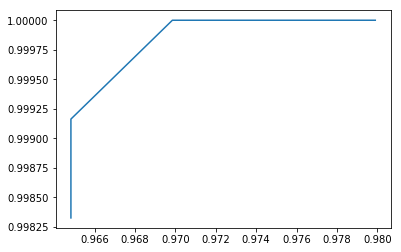

In [20]:
plt.plot(espec_c,sensibilidade)
plt.show()

___
## 5. Qualidade do Classificador alterando a base de treinamento